# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
# Extra requeriment: conda install pillow

data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [5]:
import numpy as np
show_n_images = 25
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
image = mnist_images[0]
print("Min: {}, /Max: {}".format(np.min(image), np.max(image)))
#pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

hola
Min: 0.0, /Max: 255.0


### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

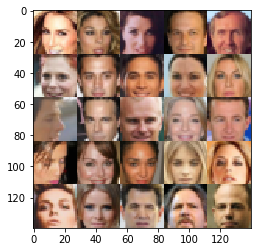

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
for image in celeba_dataset.get_batches(1):
    print("Min: {}, /Max: {}".format(np.min(image), np.max(image)))
    image *= 2.0
    print("Min: {}, /Max: {}".format(np.min(image), np.max(image)))
    break

Min: -0.4843137264251709, /Max: 0.5
Min: -0.9686274528503418, /Max: 1.0


In [16]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode, print_every=10, show_every=100, figsize=(5,5)):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    images_count = data_shape[0]
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    input_real, input_z, learning_rate_tf = model_inputs(image_width=image_width,
                                                         image_height=image_height,
                                                         image_channels=image_channels,
                                                         z_dim=z_dim)
    d_loss, g_loss = model_loss(input_real=input_real,
                                input_z=input_z,
                                out_channel_dim=image_channels)
    d_opt, g_opt = model_opt(d_loss=d_loss, g_loss=g_loss,
                             learning_rate=learning_rate_tf, beta1=beta1)
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Scale image from (-0.5, 0.5) to (-1, 1)
                batch_images *= 2.0
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={
                        input_real: batch_images,
                        input_z: batch_z,
                        learning_rate_tf: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        input_z: batch_z,
                        input_real: batch_images,
                        learning_rate_tf: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z,
                                                input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                if steps % show_every == 0:
                    show_generator_output(sess=sess,
                                          n_images=show_n_images,
                                          input_z=input_z,
                                          out_channel_dim=image_channels,
                                          image_mode=data_image_mode )
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Discriminator Loss: 0.4177... Generator Loss: 1.3635
Epoch 1/2... Discriminator Loss: 1.1103... Generator Loss: 0.4581
Epoch 1/2... Discriminator Loss: 0.0143... Generator Loss: 5.4344
Epoch 1/2... Discriminator Loss: 0.0870... Generator Loss: 3.0274
Epoch 1/2... Discriminator Loss: 0.0264... Generator Loss: 4.3562
Epoch 1/2... Discriminator Loss: 1.8675... Generator Loss: 0.2609
Epoch 1/2... Discriminator Loss: 0.1565... Generator Loss: 3.6251
Epoch 1/2... Discriminator Loss: 0.9885... Generator Loss: 2.2182
Epoch 1/2... Discriminator Loss: 1.0074... Generator Loss: 1.1000
Epoch 1/2... Discriminator Loss: 0.6374... Generator Loss: 1.7622


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.7768... Generator Loss: 1.8815
Epoch 1/2... Discriminator Loss: 0.5706... Generator Loss: 1.2528
Epoch 1/2... Discriminator Loss: 1.2508... Generator Loss: 4.1313
Epoch 1/2... Discriminator Loss: 0.3615... Generator Loss: 1.9079
Epoch 1/2... Discriminator Loss: 0.3215... Generator Loss: 2.3291
Epoch 1/2... Discriminator Loss: 0.7787... Generator Loss: 0.9698
Epoch 1/2... Discriminator Loss: 0.1915... Generator Loss: 2.3388
Epoch 1/2... Discriminator Loss: 0.1255... Generator Loss: 2.8544
Epoch 1/2... Discriminator Loss: 0.1190... Generator Loss: 2.9618
Epoch 1/2... Discriminator Loss: 0.0945... Generator Loss: 3.2887


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.1100... Generator Loss: 2.6254
Epoch 1/2... Discriminator Loss: 0.0303... Generator Loss: 4.2115
Epoch 1/2... Discriminator Loss: 0.0308... Generator Loss: 4.3437
Epoch 1/2... Discriminator Loss: 0.0232... Generator Loss: 5.0961
Epoch 1/2... Discriminator Loss: 0.0172... Generator Loss: 5.7232
Epoch 1/2... Discriminator Loss: 0.0425... Generator Loss: 3.7759
Epoch 1/2... Discriminator Loss: 0.0329... Generator Loss: 4.1913
Epoch 1/2... Discriminator Loss: 0.0204... Generator Loss: 5.4625
Epoch 1/2... Discriminator Loss: 0.0193... Generator Loss: 4.2946
Epoch 1/2... Discriminator Loss: 0.0738... Generator Loss: 2.8585


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.0128... Generator Loss: 5.1950
Epoch 1/2... Discriminator Loss: 0.1507... Generator Loss: 2.1651
Epoch 1/2... Discriminator Loss: 0.0234... Generator Loss: 4.1908
Epoch 1/2... Discriminator Loss: 0.5215... Generator Loss: 6.4618
Epoch 1/2... Discriminator Loss: 0.1410... Generator Loss: 2.8266
Epoch 1/2... Discriminator Loss: 0.0869... Generator Loss: 2.8896
Epoch 1/2... Discriminator Loss: 0.0495... Generator Loss: 7.0713
Epoch 1/2... Discriminator Loss: 0.0157... Generator Loss: 5.0759
Epoch 1/2... Discriminator Loss: 0.0351... Generator Loss: 7.0956
Epoch 1/2... Discriminator Loss: 1.3788... Generator Loss: 0.5347


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Discriminator Loss: 0.1620... Generator Loss: 2.3576
Epoch 1/2... Discriminator Loss: 0.3376... Generator Loss: 1.5917
Epoch 1/2... Discriminator Loss: 0.0626... Generator Loss: 8.5637
Epoch 1/2... Discriminator Loss: 0.0223... Generator Loss: 4.2443
Epoch 1/2... Discriminator Loss: 4.1135... Generator Loss: 7.9935
Epoch 1/2... Discriminator Loss: 0.1219... Generator Loss: 3.3335
Epoch 2/2... Discriminator Loss: 0.0289... Generator Loss: 7.5872
Epoch 2/2... Discriminator Loss: 0.4478... Generator Loss: 1.2179
Epoch 2/2... Discriminator Loss: 0.1012... Generator Loss: 3.7930
Epoch 2/2... Discriminator Loss: 0.0478... Generator Loss: 4.0656


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.0555... Generator Loss: 5.4717
Epoch 2/2... Discriminator Loss: 0.0251... Generator Loss: 10.5601
Epoch 2/2... Discriminator Loss: 0.4994... Generator Loss: 3.6545
Epoch 2/2... Discriminator Loss: 0.1225... Generator Loss: 2.6630
Epoch 2/2... Discriminator Loss: 2.8287... Generator Loss: 0.0756
Epoch 2/2... Discriminator Loss: 0.0439... Generator Loss: 7.0199
Epoch 2/2... Discriminator Loss: 0.0453... Generator Loss: 9.0252
Epoch 2/2... Discriminator Loss: 0.1055... Generator Loss: 5.9999
Epoch 2/2... Discriminator Loss: 1.0002... Generator Loss: 2.6612
Epoch 2/2... Discriminator Loss: 0.7565... Generator Loss: 0.8313


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.0528... Generator Loss: 5.4758
Epoch 2/2... Discriminator Loss: 0.3247... Generator Loss: 1.6550
Epoch 2/2... Discriminator Loss: 0.3030... Generator Loss: 10.7701
Epoch 2/2... Discriminator Loss: 0.2962... Generator Loss: 2.9389
Epoch 2/2... Discriminator Loss: 0.1704... Generator Loss: 2.2806
Epoch 2/2... Discriminator Loss: 0.1399... Generator Loss: 2.4060
Epoch 2/2... Discriminator Loss: 0.0406... Generator Loss: 4.5492
Epoch 2/2... Discriminator Loss: 0.0952... Generator Loss: 3.4147
Epoch 2/2... Discriminator Loss: 0.0378... Generator Loss: 10.6462
Epoch 2/2... Discriminator Loss: 0.1706... Generator Loss: 2.6773


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.3421... Generator Loss: 4.4183
Epoch 2/2... Discriminator Loss: 0.0264... Generator Loss: 6.3958
Epoch 2/2... Discriminator Loss: 0.3157... Generator Loss: 2.5633
Epoch 2/2... Discriminator Loss: 0.3237... Generator Loss: 1.8809
Epoch 2/2... Discriminator Loss: 0.1108... Generator Loss: 3.6465
Epoch 2/2... Discriminator Loss: 0.1973... Generator Loss: 2.0365
Epoch 2/2... Discriminator Loss: 0.0831... Generator Loss: 3.1038
Epoch 2/2... Discriminator Loss: 0.2109... Generator Loss: 2.0112
Epoch 2/2... Discriminator Loss: 0.0477... Generator Loss: 4.1559
Epoch 2/2... Discriminator Loss: 0.1511... Generator Loss: 5.4527


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.0542... Generator Loss: 3.7084
Epoch 2/2... Discriminator Loss: 0.0721... Generator Loss: 3.9813
Epoch 2/2... Discriminator Loss: 0.2250... Generator Loss: 2.1268
Epoch 2/2... Discriminator Loss: 0.0422... Generator Loss: 4.6134
Epoch 2/2... Discriminator Loss: 0.2068... Generator Loss: 2.3596
Epoch 2/2... Discriminator Loss: 0.0538... Generator Loss: 5.1904
Epoch 2/2... Discriminator Loss: 0.0912... Generator Loss: 3.4483
Epoch 2/2... Discriminator Loss: 0.0888... Generator Loss: 3.2680
Epoch 2/2... Discriminator Loss: 0.7762... Generator Loss: 0.8311
Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 3.0897


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 2/2... Discriminator Loss: 0.6769... Generator Loss: 0.9803
Epoch 2/2... Discriminator Loss: 0.3309... Generator Loss: 1.8666
Epoch 2/2... Discriminator Loss: 0.5116... Generator Loss: 1.1633


### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7213... Generator Loss: 1.2382
Epoch 1/1... Discriminator Loss: 0.2779... Generator Loss: 2.2645
Epoch 1/1... Discriminator Loss: 0.3890... Generator Loss: 1.6632
Epoch 1/1... Discriminator Loss: 0.6479... Generator Loss: 1.1121
Epoch 1/1... Discriminator Loss: 0.8607... Generator Loss: 3.7032
Epoch 1/1... Discriminator Loss: 0.5037... Generator Loss: 1.9131
Epoch 1/1... Discriminator Loss: 0.3247... Generator Loss: 2.0400
Epoch 1/1... Discriminator Loss: 0.1858... Generator Loss: 2.9966
Epoch 1/1... Discriminator Loss: 0.1575... Generator Loss: 2.6722
Epoch 1/1... Discriminator Loss: 0.0476... Generator Loss: 3.9256


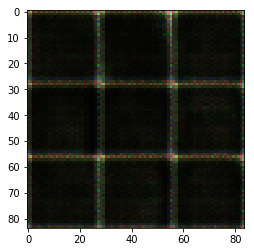

Epoch 1/1... Discriminator Loss: 0.0706... Generator Loss: 3.5517
Epoch 1/1... Discriminator Loss: 0.0309... Generator Loss: 4.2784
Epoch 1/1... Discriminator Loss: 0.0453... Generator Loss: 4.3566
Epoch 1/1... Discriminator Loss: 0.0525... Generator Loss: 3.5782
Epoch 1/1... Discriminator Loss: 0.0342... Generator Loss: 4.2778
Epoch 1/1... Discriminator Loss: 0.0180... Generator Loss: 4.8241
Epoch 1/1... Discriminator Loss: 0.0352... Generator Loss: 3.8744
Epoch 1/1... Discriminator Loss: 0.0335... Generator Loss: 3.9791
Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.4387
Epoch 1/1... Discriminator Loss: 0.0367... Generator Loss: 5.0173


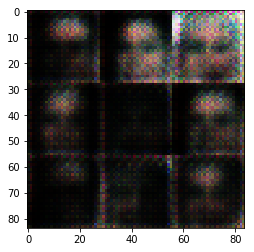

Epoch 1/1... Discriminator Loss: 0.0127... Generator Loss: 9.8379
Epoch 1/1... Discriminator Loss: 0.1408... Generator Loss: 2.5106
Epoch 1/1... Discriminator Loss: 0.0476... Generator Loss: 6.3778
Epoch 1/1... Discriminator Loss: 0.0133... Generator Loss: 7.5830
Epoch 1/1... Discriminator Loss: 0.0017... Generator Loss: 15.4286
Epoch 1/1... Discriminator Loss: 0.0051... Generator Loss: 6.8903
Epoch 1/1... Discriminator Loss: 0.0258... Generator Loss: 5.8101
Epoch 1/1... Discriminator Loss: 0.0598... Generator Loss: 12.1190
Epoch 1/1... Discriminator Loss: 0.0785... Generator Loss: 5.2263
Epoch 1/1... Discriminator Loss: 0.0521... Generator Loss: 8.9198


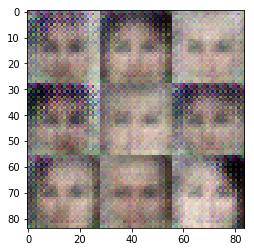

Epoch 1/1... Discriminator Loss: 0.2410... Generator Loss: 5.8750
Epoch 1/1... Discriminator Loss: 0.2506... Generator Loss: 3.3507
Epoch 1/1... Discriminator Loss: 0.2847... Generator Loss: 1.8240
Epoch 1/1... Discriminator Loss: 0.9319... Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 1.6976... Generator Loss: 0.3118
Epoch 1/1... Discriminator Loss: 0.0882... Generator Loss: 7.5192
Epoch 1/1... Discriminator Loss: 0.1630... Generator Loss: 2.3541
Epoch 1/1... Discriminator Loss: 0.1334... Generator Loss: 4.6247
Epoch 1/1... Discriminator Loss: 0.0178... Generator Loss: 8.3959
Epoch 1/1... Discriminator Loss: 0.2651... Generator Loss: 6.9911


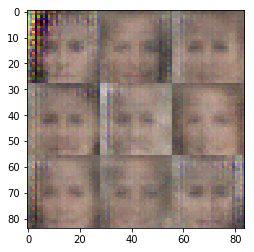

Epoch 1/1... Discriminator Loss: 0.1297... Generator Loss: 2.8097
Epoch 1/1... Discriminator Loss: 0.1322... Generator Loss: 2.7907
Epoch 1/1... Discriminator Loss: 0.1942... Generator Loss: 3.1398
Epoch 1/1... Discriminator Loss: 0.2742... Generator Loss: 3.2729
Epoch 1/1... Discriminator Loss: 0.0403... Generator Loss: 6.3117
Epoch 1/1... Discriminator Loss: 0.0163... Generator Loss: 10.8785
Epoch 1/1... Discriminator Loss: 0.0934... Generator Loss: 3.4861
Epoch 1/1... Discriminator Loss: 0.0217... Generator Loss: 6.9761
Epoch 1/1... Discriminator Loss: 0.1280... Generator Loss: 2.5153
Epoch 1/1... Discriminator Loss: 0.0979... Generator Loss: 3.3651


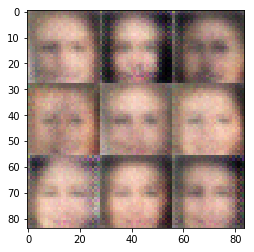

Epoch 1/1... Discriminator Loss: 3.3012... Generator Loss: 10.3928
Epoch 1/1... Discriminator Loss: 5.1236... Generator Loss: 0.0085
Epoch 1/1... Discriminator Loss: 0.1795... Generator Loss: 2.2171
Epoch 1/1... Discriminator Loss: 0.2273... Generator Loss: 2.1900
Epoch 1/1... Discriminator Loss: 0.2372... Generator Loss: 2.3236
Epoch 1/1... Discriminator Loss: 0.0467... Generator Loss: 3.9389
Epoch 1/1... Discriminator Loss: 0.0420... Generator Loss: 7.0877
Epoch 1/1... Discriminator Loss: 0.1592... Generator Loss: 2.5430
Epoch 1/1... Discriminator Loss: 0.3478... Generator Loss: 3.3242
Epoch 1/1... Discriminator Loss: 0.1708... Generator Loss: 4.4440


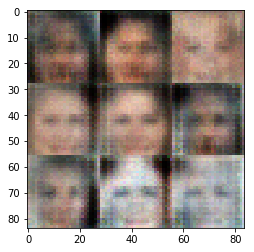

Epoch 1/1... Discriminator Loss: 0.0580... Generator Loss: 4.4431
Epoch 1/1... Discriminator Loss: 0.0162... Generator Loss: 6.8538
Epoch 1/1... Discriminator Loss: 0.7056... Generator Loss: 0.8975
Epoch 1/1... Discriminator Loss: 0.2277... Generator Loss: 2.3862
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 0.6386
Epoch 1/1... Discriminator Loss: 0.6808... Generator Loss: 3.4776
Epoch 1/1... Discriminator Loss: 0.1330... Generator Loss: 3.0097
Epoch 1/1... Discriminator Loss: 0.0112... Generator Loss: 11.5195
Epoch 1/1... Discriminator Loss: 0.2528... Generator Loss: 3.2977
Epoch 1/1... Discriminator Loss: 0.0329... Generator Loss: 8.3874


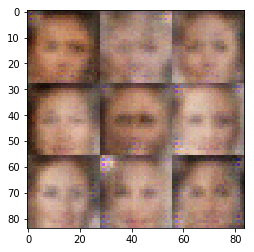

Epoch 1/1... Discriminator Loss: 0.3502... Generator Loss: 2.2396
Epoch 1/1... Discriminator Loss: 0.4511... Generator Loss: 1.6991
Epoch 1/1... Discriminator Loss: 0.0572... Generator Loss: 3.9755
Epoch 1/1... Discriminator Loss: 0.4403... Generator Loss: 3.7780
Epoch 1/1... Discriminator Loss: 0.8892... Generator Loss: 3.1840
Epoch 1/1... Discriminator Loss: 0.2182... Generator Loss: 2.2050
Epoch 1/1... Discriminator Loss: 0.0439... Generator Loss: 5.2928
Epoch 1/1... Discriminator Loss: 0.0821... Generator Loss: 9.6899
Epoch 1/1... Discriminator Loss: 2.0880... Generator Loss: 0.3830
Epoch 1/1... Discriminator Loss: 0.0221... Generator Loss: 6.7938


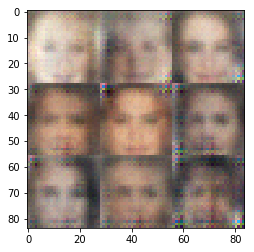

Epoch 1/1... Discriminator Loss: 0.5441... Generator Loss: 2.3600
Epoch 1/1... Discriminator Loss: 0.5050... Generator Loss: 1.6932
Epoch 1/1... Discriminator Loss: 0.6586... Generator Loss: 1.4034
Epoch 1/1... Discriminator Loss: 0.1997... Generator Loss: 2.7318
Epoch 1/1... Discriminator Loss: 0.0453... Generator Loss: 6.5383
Epoch 1/1... Discriminator Loss: 0.1127... Generator Loss: 3.5264
Epoch 1/1... Discriminator Loss: 0.4353... Generator Loss: 1.7090
Epoch 1/1... Discriminator Loss: 0.1014... Generator Loss: 3.6786
Epoch 1/1... Discriminator Loss: 0.0691... Generator Loss: 4.0195
Epoch 1/1... Discriminator Loss: 0.1746... Generator Loss: 10.3959


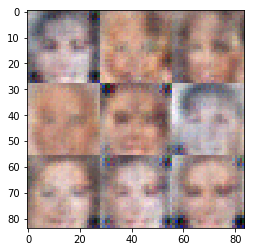

Epoch 1/1... Discriminator Loss: 4.7498... Generator Loss: 0.0117
Epoch 1/1... Discriminator Loss: 0.3419... Generator Loss: 3.2455
Epoch 1/1... Discriminator Loss: 0.2873... Generator Loss: 1.9546
Epoch 1/1... Discriminator Loss: 0.1535... Generator Loss: 2.7781
Epoch 1/1... Discriminator Loss: 0.0989... Generator Loss: 4.3705
Epoch 1/1... Discriminator Loss: 0.2439... Generator Loss: 2.9769
Epoch 1/1... Discriminator Loss: 0.1262... Generator Loss: 6.6537
Epoch 1/1... Discriminator Loss: 0.0293... Generator Loss: 6.0724
Epoch 1/1... Discriminator Loss: 0.4961... Generator Loss: 2.9263
Epoch 1/1... Discriminator Loss: 0.1157... Generator Loss: 12.4855


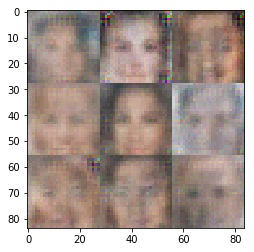

Epoch 1/1... Discriminator Loss: 0.0500... Generator Loss: 6.8184
Epoch 1/1... Discriminator Loss: 0.3156... Generator Loss: 8.6734
Epoch 1/1... Discriminator Loss: 3.9665... Generator Loss: 1.0672
Epoch 1/1... Discriminator Loss: 0.1298... Generator Loss: 4.8475
Epoch 1/1... Discriminator Loss: 0.1328... Generator Loss: 7.9472
Epoch 1/1... Discriminator Loss: 0.0559... Generator Loss: 11.8697
Epoch 1/1... Discriminator Loss: 0.0737... Generator Loss: 3.9538
Epoch 1/1... Discriminator Loss: 0.1487... Generator Loss: 2.5639
Epoch 1/1... Discriminator Loss: 0.0529... Generator Loss: 5.2338
Epoch 1/1... Discriminator Loss: 2.5355... Generator Loss: 5.9810


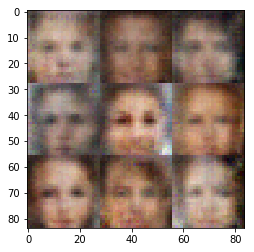

Epoch 1/1... Discriminator Loss: 0.3498... Generator Loss: 1.7667
Epoch 1/1... Discriminator Loss: 0.0277... Generator Loss: 5.9019
Epoch 1/1... Discriminator Loss: 0.0434... Generator Loss: 5.0708
Epoch 1/1... Discriminator Loss: 0.2636... Generator Loss: 1.7693
Epoch 1/1... Discriminator Loss: 0.0244... Generator Loss: 5.2990
Epoch 1/1... Discriminator Loss: 0.6676... Generator Loss: 6.1708
Epoch 1/1... Discriminator Loss: 0.0393... Generator Loss: 4.0924
Epoch 1/1... Discriminator Loss: 0.0610... Generator Loss: 6.0144
Epoch 1/1... Discriminator Loss: 0.0539... Generator Loss: 6.6366
Epoch 1/1... Discriminator Loss: 0.0318... Generator Loss: 8.8137


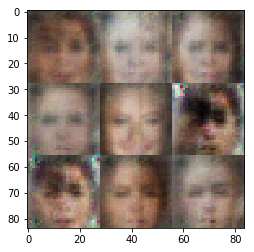

Epoch 1/1... Discriminator Loss: 0.0963... Generator Loss: 7.6216
Epoch 1/1... Discriminator Loss: 0.0122... Generator Loss: 6.2957
Epoch 1/1... Discriminator Loss: 0.2479... Generator Loss: 2.0093
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 4.0242
Epoch 1/1... Discriminator Loss: 0.7730... Generator Loss: 1.9794
Epoch 1/1... Discriminator Loss: 0.1354... Generator Loss: 4.3026
Epoch 1/1... Discriminator Loss: 0.6405... Generator Loss: 1.2220
Epoch 1/1... Discriminator Loss: 0.1425... Generator Loss: 2.7422
Epoch 1/1... Discriminator Loss: 0.1228... Generator Loss: 4.6268
Epoch 1/1... Discriminator Loss: 0.0549... Generator Loss: 3.8449


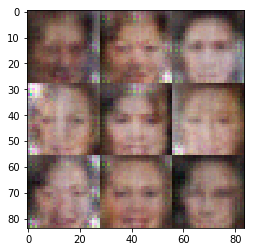

Epoch 1/1... Discriminator Loss: 0.0555... Generator Loss: 7.9109
Epoch 1/1... Discriminator Loss: 0.1036... Generator Loss: 9.3059
Epoch 1/1... Discriminator Loss: 0.0167... Generator Loss: 13.7445
Epoch 1/1... Discriminator Loss: 0.0099... Generator Loss: 7.9850
Epoch 1/1... Discriminator Loss: 0.2036... Generator Loss: 2.0077
Epoch 1/1... Discriminator Loss: 0.0062... Generator Loss: 12.2804
Epoch 1/1... Discriminator Loss: 1.7190... Generator Loss: 0.3352
Epoch 1/1... Discriminator Loss: 0.0271... Generator Loss: 12.3850
Epoch 1/1... Discriminator Loss: 0.0195... Generator Loss: 6.4012
Epoch 1/1... Discriminator Loss: 0.0267... Generator Loss: 11.4556


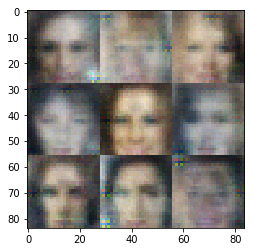

Epoch 1/1... Discriminator Loss: 0.0280... Generator Loss: 7.3818
Epoch 1/1... Discriminator Loss: 0.0058... Generator Loss: 10.7996
Epoch 1/1... Discriminator Loss: 0.0089... Generator Loss: 9.7589
Epoch 1/1... Discriminator Loss: 0.6983... Generator Loss: 0.9039
Epoch 1/1... Discriminator Loss: 0.0394... Generator Loss: 4.0372
Epoch 1/1... Discriminator Loss: 0.2649... Generator Loss: 1.7608
Epoch 1/1... Discriminator Loss: 0.0836... Generator Loss: 3.1561
Epoch 1/1... Discriminator Loss: 0.0048... Generator Loss: 7.5463
Epoch 1/1... Discriminator Loss: 0.2023... Generator Loss: 12.3942
Epoch 1/1... Discriminator Loss: 0.0075... Generator Loss: 7.1808


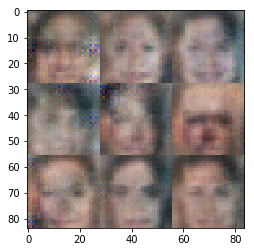

Epoch 1/1... Discriminator Loss: 0.6888... Generator Loss: 0.8722
Epoch 1/1... Discriminator Loss: 1.7002... Generator Loss: 0.3344
Epoch 1/1... Discriminator Loss: 1.8972... Generator Loss: 0.1954
Epoch 1/1... Discriminator Loss: 0.4481... Generator Loss: 1.2150
Epoch 1/1... Discriminator Loss: 0.0546... Generator Loss: 4.7673
Epoch 1/1... Discriminator Loss: 0.0422... Generator Loss: 9.9090
Epoch 1/1... Discriminator Loss: 0.7866... Generator Loss: 0.7837
Epoch 1/1... Discriminator Loss: 0.0411... Generator Loss: 8.1339


In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

Epoch 1/1... Discriminator Loss: 0.5072... Generator Loss: 2.0034
Epoch 1/1... Discriminator Loss: 0.2664... Generator Loss: 3.3302
Epoch 1/1... Discriminator Loss: 0.2005... Generator Loss: 3.1132
Epoch 1/1... Discriminator Loss: 1.1548... Generator Loss: 3.4404
Epoch 1/1... Discriminator Loss: 0.8499... Generator Loss: 1.0541
Epoch 1/1... Discriminator Loss: 0.5954... Generator Loss: 1.5401
Epoch 1/1... Discriminator Loss: 0.6717... Generator Loss: 1.2779
Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 5.4548
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 4.3043
Epoch 1/1... Discriminator Loss: 1.0607... Generator Loss: 0.5606


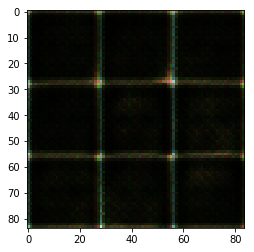

Epoch 1/1... Discriminator Loss: 0.5026... Generator Loss: 1.4164
Epoch 1/1... Discriminator Loss: 0.4227... Generator Loss: 1.9214
Epoch 1/1... Discriminator Loss: 0.5906... Generator Loss: 1.5008
Epoch 1/1... Discriminator Loss: 0.5748... Generator Loss: 1.4334
Epoch 1/1... Discriminator Loss: 0.2777... Generator Loss: 1.9064
Epoch 1/1... Discriminator Loss: 0.4971... Generator Loss: 1.8991
Epoch 1/1... Discriminator Loss: 0.4535... Generator Loss: 1.7377
Epoch 1/1... Discriminator Loss: 0.9972... Generator Loss: 0.6281
Epoch 1/1... Discriminator Loss: 0.6098... Generator Loss: 3.1657
Epoch 1/1... Discriminator Loss: 1.7415... Generator Loss: 4.2110


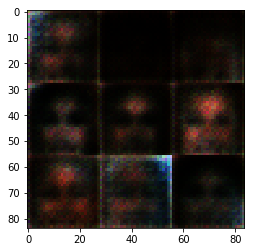

Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 3.1286
Epoch 1/1... Discriminator Loss: 0.6385... Generator Loss: 2.3174
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 1.4364
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.5679
Epoch 1/1... Discriminator Loss: 1.1794... Generator Loss: 0.9865
Epoch 1/1... Discriminator Loss: 1.0709... Generator Loss: 2.8241
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.4745
Epoch 1/1... Discriminator Loss: 0.7231... Generator Loss: 5.4632
Epoch 1/1... Discriminator Loss: 2.2234... Generator Loss: 0.1753
Epoch 1/1... Discriminator Loss: 0.9003... Generator Loss: 4.5910


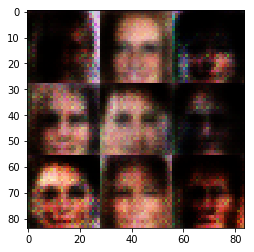

Epoch 1/1... Discriminator Loss: 1.1703... Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 0.6930... Generator Loss: 1.4408
Epoch 1/1... Discriminator Loss: 0.7569... Generator Loss: 0.8864
Epoch 1/1... Discriminator Loss: 0.9105... Generator Loss: 1.9150
Epoch 1/1... Discriminator Loss: 0.4826... Generator Loss: 2.9333
Epoch 1/1... Discriminator Loss: 1.6768... Generator Loss: 0.3058
Epoch 1/1... Discriminator Loss: 0.5795... Generator Loss: 2.7596
Epoch 1/1... Discriminator Loss: 0.2445... Generator Loss: 2.5327
Epoch 1/1... Discriminator Loss: 0.9393... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 0.6890... Generator Loss: 2.8480


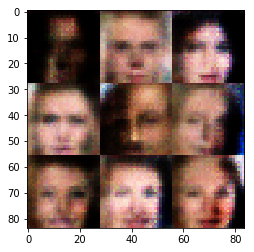

Epoch 1/1... Discriminator Loss: 0.7558... Generator Loss: 0.9613
Epoch 1/1... Discriminator Loss: 0.3663... Generator Loss: 2.0124
Epoch 1/1... Discriminator Loss: 0.2639... Generator Loss: 2.9074
Epoch 1/1... Discriminator Loss: 2.8760... Generator Loss: 4.0495
Epoch 1/1... Discriminator Loss: 0.2324... Generator Loss: 2.7995
Epoch 1/1... Discriminator Loss: 1.6928... Generator Loss: 0.2745
Epoch 1/1... Discriminator Loss: 0.3011... Generator Loss: 4.5495
Epoch 1/1... Discriminator Loss: 0.9229... Generator Loss: 3.5757
Epoch 1/1... Discriminator Loss: 0.6873... Generator Loss: 1.2455
Epoch 1/1... Discriminator Loss: 0.6314... Generator Loss: 1.1726


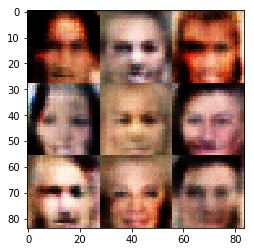

Epoch 1/1... Discriminator Loss: 0.4730... Generator Loss: 2.0507
Epoch 1/1... Discriminator Loss: 0.2518... Generator Loss: 1.9497
Epoch 1/1... Discriminator Loss: 0.5573... Generator Loss: 1.5516
Epoch 1/1... Discriminator Loss: 0.9769... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 0.2713... Generator Loss: 4.0086
Epoch 1/1... Discriminator Loss: 0.1834... Generator Loss: 2.7488
Epoch 1/1... Discriminator Loss: 0.1549... Generator Loss: 3.1420
Epoch 1/1... Discriminator Loss: 0.5669... Generator Loss: 1.1543
Epoch 1/1... Discriminator Loss: 0.4294... Generator Loss: 1.9794
Epoch 1/1... Discriminator Loss: 0.6799... Generator Loss: 0.8929


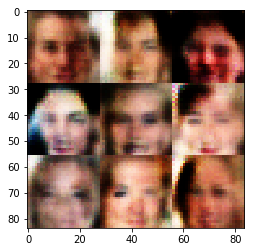

Epoch 1/1... Discriminator Loss: 0.3077... Generator Loss: 2.0274
Epoch 1/1... Discriminator Loss: 0.2775... Generator Loss: 3.2366
Epoch 1/1... Discriminator Loss: 1.2179... Generator Loss: 2.5324
Epoch 1/1... Discriminator Loss: 0.2594... Generator Loss: 3.2383
Epoch 1/1... Discriminator Loss: 0.2124... Generator Loss: 3.7359
Epoch 1/1... Discriminator Loss: 0.2366... Generator Loss: 3.6686
Epoch 1/1... Discriminator Loss: 1.1926... Generator Loss: 1.1106
Epoch 1/1... Discriminator Loss: 0.4108... Generator Loss: 3.1784
Epoch 1/1... Discriminator Loss: 0.6395... Generator Loss: 1.1307
Epoch 1/1... Discriminator Loss: 0.5645... Generator Loss: 1.9933


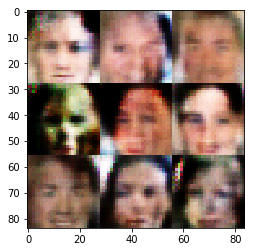

Epoch 1/1... Discriminator Loss: 0.4429... Generator Loss: 1.5817
Epoch 1/1... Discriminator Loss: 0.3709... Generator Loss: 2.6549
Epoch 1/1... Discriminator Loss: 1.6862... Generator Loss: 2.0472
Epoch 1/1... Discriminator Loss: 0.4300... Generator Loss: 2.6064
Epoch 1/1... Discriminator Loss: 0.4118... Generator Loss: 2.4248
Epoch 1/1... Discriminator Loss: 0.1842... Generator Loss: 3.1689
Epoch 1/1... Discriminator Loss: 0.3564... Generator Loss: 2.2876
Epoch 1/1... Discriminator Loss: 0.7608... Generator Loss: 0.8760
Epoch 1/1... Discriminator Loss: 0.3166... Generator Loss: 2.6826
Epoch 1/1... Discriminator Loss: 0.2896... Generator Loss: 2.6619


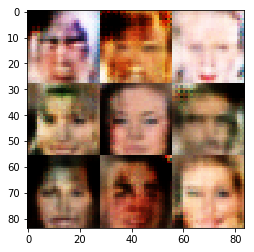

Epoch 1/1... Discriminator Loss: 0.4331... Generator Loss: 3.2449
Epoch 1/1... Discriminator Loss: 0.6654... Generator Loss: 1.1990
Epoch 1/1... Discriminator Loss: 0.2813... Generator Loss: 1.9339
Epoch 1/1... Discriminator Loss: 2.0976... Generator Loss: 0.5605
Epoch 1/1... Discriminator Loss: 0.8645... Generator Loss: 0.7524
Epoch 1/1... Discriminator Loss: 0.7093... Generator Loss: 3.4053
Epoch 1/1... Discriminator Loss: 0.4944... Generator Loss: 1.7555
Epoch 1/1... Discriminator Loss: 0.4798... Generator Loss: 1.8702
Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 4.5273
Epoch 1/1... Discriminator Loss: 0.6119... Generator Loss: 1.1445


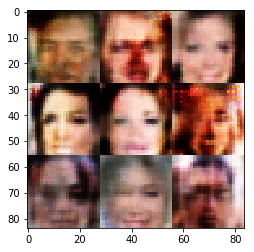

Epoch 1/1... Discriminator Loss: 0.5188... Generator Loss: 1.8671
Epoch 1/1... Discriminator Loss: 0.3403... Generator Loss: 1.9020
Epoch 1/1... Discriminator Loss: 0.1821... Generator Loss: 3.0816
Epoch 1/1... Discriminator Loss: 0.1793... Generator Loss: 3.8323
Epoch 1/1... Discriminator Loss: 0.7111... Generator Loss: 1.2709
Epoch 1/1... Discriminator Loss: 0.8088... Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 0.7363... Generator Loss: 0.8398
Epoch 1/1... Discriminator Loss: 0.7623... Generator Loss: 3.8087
Epoch 1/1... Discriminator Loss: 0.2803... Generator Loss: 2.4582
Epoch 1/1... Discriminator Loss: 0.2986... Generator Loss: 2.7892


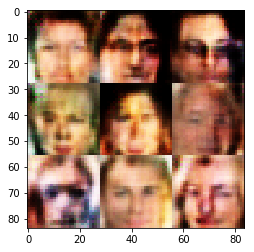

Epoch 1/1... Discriminator Loss: 0.3338... Generator Loss: 3.2538
Epoch 1/1... Discriminator Loss: 0.3090... Generator Loss: 1.8377
Epoch 1/1... Discriminator Loss: 0.2293... Generator Loss: 2.3005
Epoch 1/1... Discriminator Loss: 0.6556... Generator Loss: 2.5045
Epoch 1/1... Discriminator Loss: 0.5396... Generator Loss: 3.4742
Epoch 1/1... Discriminator Loss: 0.4754... Generator Loss: 2.2224
Epoch 1/1... Discriminator Loss: 0.5623... Generator Loss: 4.2565
Epoch 1/1... Discriminator Loss: 0.4726... Generator Loss: 4.8180
Epoch 1/1... Discriminator Loss: 0.7353... Generator Loss: 0.8127
Epoch 1/1... Discriminator Loss: 0.4013... Generator Loss: 3.3811


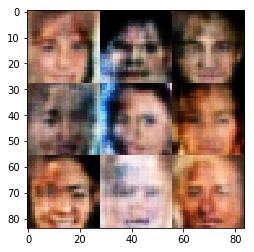

Epoch 1/1... Discriminator Loss: 0.1836... Generator Loss: 3.5819
Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 0.5632
Epoch 1/1... Discriminator Loss: 0.5309... Generator Loss: 1.0718
Epoch 1/1... Discriminator Loss: 0.2044... Generator Loss: 3.8786
Epoch 1/1... Discriminator Loss: 0.4086... Generator Loss: 1.5225
Epoch 1/1... Discriminator Loss: 0.1880... Generator Loss: 2.5156
Epoch 1/1... Discriminator Loss: 0.2920... Generator Loss: 2.1943
Epoch 1/1... Discriminator Loss: 0.3027... Generator Loss: 2.8908
Epoch 1/1... Discriminator Loss: 2.2079... Generator Loss: 0.2469
Epoch 1/1... Discriminator Loss: 0.7352... Generator Loss: 2.6814


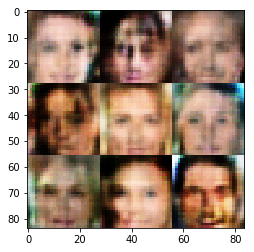

Epoch 1/1... Discriminator Loss: 0.6860... Generator Loss: 0.9816
Epoch 1/1... Discriminator Loss: 0.5616... Generator Loss: 1.2649
Epoch 1/1... Discriminator Loss: 0.3928... Generator Loss: 1.7046


In [ ]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)